<a href="https://colab.research.google.com/github/MariamSalah18/Heart-Disease/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [ ]:
data =pd.read_csv("/content/Heart_Disease.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       270 non-null    int64  
 1   Age                      264 non-null    float64
 2   Gender                   264 non-null    object 
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  work_type                2

In [ ]:
data['Gender']=data['Gender'].replace("Male",0)
data['Gender']=data['Gender'].replace("Female",1)
data['Gender'].head(20)

0     1.0
1     0.0
2     1.0
3     1.0
4     0.0
5     1.0
6     1.0
7     1.0
8     1.0
9     0.0
10    1.0
11    1.0
12    1.0
13    1.0
14    NaN
15    0.0
16    1.0
17    1.0
18    1.0
19    1.0
Name: Gender, dtype: float64

In [ ]:
data['Heart Disease']=data['Heart Disease'].replace("No",0)
data['Heart Disease']=data['Heart Disease'].replace("Yes",1)

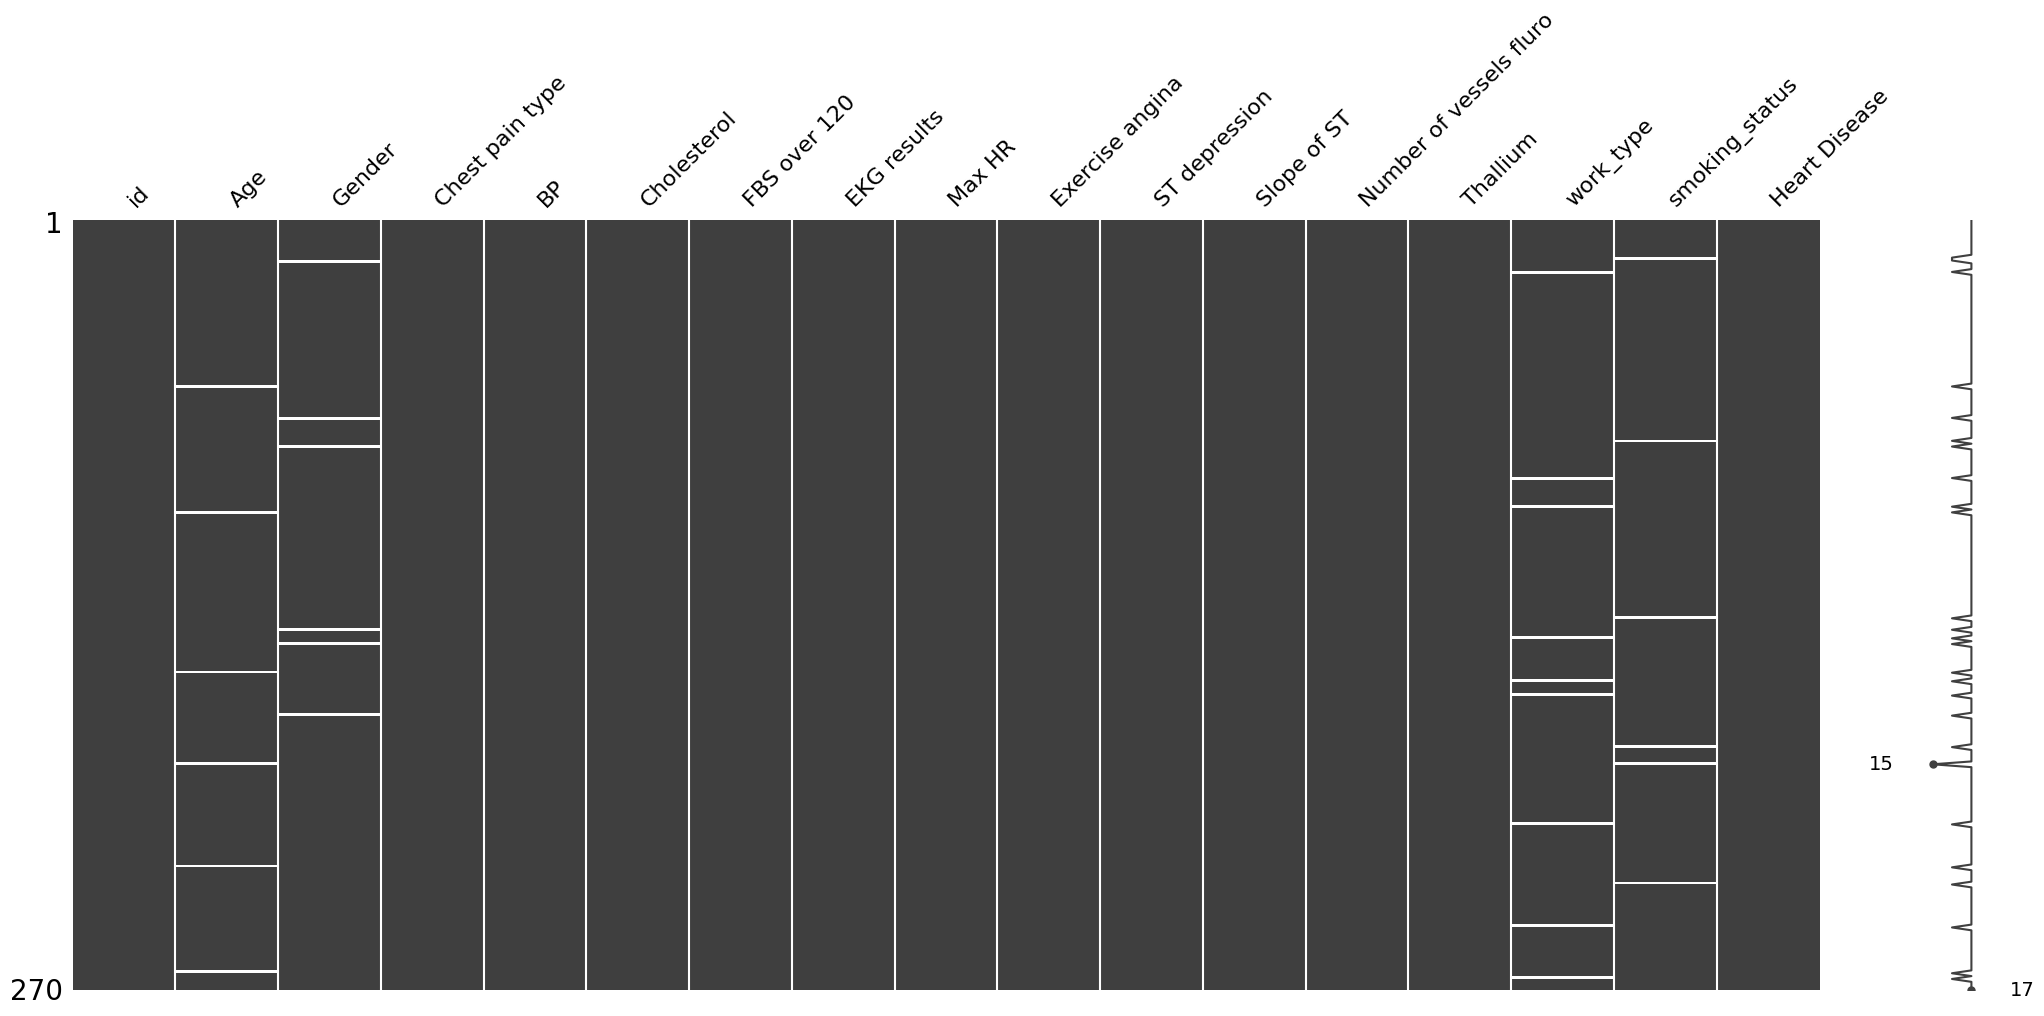

In [ ]:
import missingno as msno
msno.matrix(data)
plt.show()

In [ ]:
print(data.isnull().sum())

id                         0
Age                        6
Gender                     6
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  9
smoking_status             6
Heart Disease              0
dtype: int64


In [ ]:
data['Age'].fillna(data['Age'].mean(),inplace=True)
data['Age'].tail(20)

250    54.000000
251    44.000000
252    44.000000
253    51.000000
254    59.000000
255    71.000000
256    61.000000
257    55.000000
258    64.000000
259    43.000000
260    58.000000
261    60.000000
262    58.000000
263    54.424242
264    48.000000
265    52.000000
266    44.000000
267    56.000000
268    57.000000
269    67.000000
Name: Age, dtype: float64

In [ ]:
data['Gender'].fillna(1.0, inplace=True)
data['Gender'].head(20)

0     1.0
1     0.0
2     1.0
3     1.0
4     0.0
5     1.0
6     1.0
7     1.0
8     1.0
9     0.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    0.0
16    1.0
17    1.0
18    1.0
19    1.0
Name: Gender, dtype: float64

In [ ]:
data=pd.get_dummies(data,columns=['Chest pain type', 'EKG results', 'Slope of ST', 'Thallium', 'smoking_status','work_type'])

In [ ]:
print (data.isnull().sum())  

id                                0
Age                               0
Gender                            0
BP                                0
Cholesterol                       0
FBS over 120                      0
Max HR                            0
Exercise angina                   0
ST depression                     0
Number of vessels fluro           0
Heart Disease                     0
Chest pain type_1                 0
Chest pain type_2                 0
Chest pain type_3                 0
Chest pain type_4                 0
EKG results_0                     0
EKG results_1                     0
EKG results_2                     0
Slope of ST_1                     0
Slope of ST_2                     0
Slope of ST_3                     0
Thallium_3                        0
Thallium_6                        0
Thallium_7                        0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes       

In [ ]:
data.duplicated().sum()

0

<Axes: >

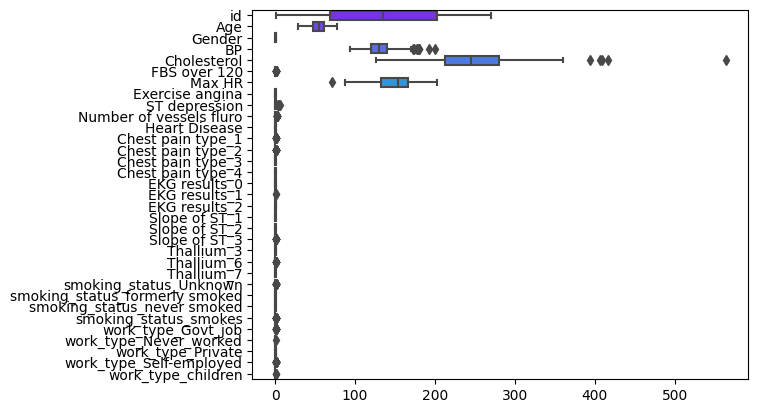

In [ ]:
sns.boxplot(data=data, palette='rainbow', orient='h')

In [ ]:
for col in data.columns:
    # Check if the column has outliers (values outside of 1.5 times the interquartile range)
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - 1.5*IQR
    upper_limit = q3 + 1.5*IQR
    if (data[col] > upper_limit).sum() + (data[col] < lower_limit).sum() > 0:
        # Replace the outliers with the maximum and minimum values of the column
        data[col] = data[col].clip(lower_limit, upper_limit)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['Age', 'BP', 'Cholesterol', 'FBS over 120', 'Max HR', 'ST depression']] = scaler.fit_transform(data[['Age', 'BP', 'Cholesterol', 'FBS over 120', 'Max HR', 'ST depression']])

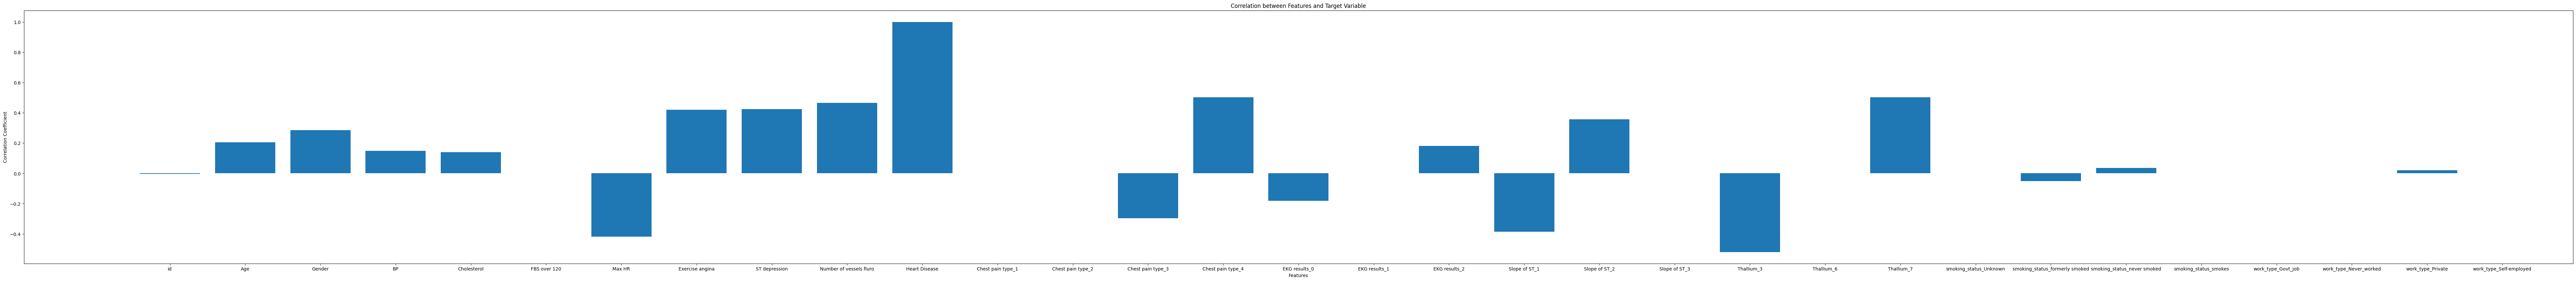

In [ ]:
corr_coeffs = data.corr()['Heart Disease']
fig, ax = plt.subplots(figsize=(100,10))
ax.bar(corr_coeffs.index, corr_coeffs.values)
ax.set_xlabel('Features')
ax.set_ylabel('Correlation Coefficient')
ax.set_title('Correlation between Features and Target Variable')
plt.show()

In [ ]:
data=data.drop('id',axis=1)
data=data.drop('work_type_Govt_job',axis=1)
data=data.drop('work_type_Never_worked',axis=1)
data=data.drop('work_type_Private',axis=1)
data=data.drop('work_type_Self-employed',axis=1)
data=data.drop('work_type_children',axis=1)

In [ ]:
x=data.drop('Heart Disease',axis=1)
y=data['Heart Disease']
x.head()

,Age,Gender,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Number of vessels fluro,Chest pain type_1,...,Slope of ST_1,Slope of ST_2,Slope of ST_3,Thallium_3,Thallium_6,Thallium_7,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.854167,1.0,0.473684,0.770138,0.0,0.215190,0,0.600,2.5,0,...,0,1,0,1,0,0,0,1,0,0
1,0.791667,0.0,0.276316,1.000000,0.0,0.645570,0,0.400,0.0,0,...,0,1,0,0,0,1,0,0,1,0
2,0.583333,1.0,0.394737,0.530452,0.0,0.485232,0,0.075,0.0,0,...,1,0,0,0,0,1,0,0,1,0
3,0.729167,1.0,0.447368,0.538310,0.0,0.181435,1,0.050,1.0,0,...,0,1,0,0,0,1,0,0,0,0
4,0.937500,0.0,0.342105,0.561886,0.0,0.316456,1,0.050,1.0,0,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=44)

In [ ]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
lr_acc = accuracy_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_cm = confusion_matrix(y_test, lr_pred)
lr_cr = classification_report(y_test, lr_pred)
print("\nLogistic Regression model results:")
print("Logistic Regression accuracy:", lr_acc)
print("Mean Squared Error:", lr_mse)
print("Confusion Matrix:\n", lr_cm)
print("Classification Report:\n", lr_cr)


Logistic Regression model results:
Logistic Regression accuracy: 0.8518518518518519
Mean Squared Error: 0.14814814814814814
Confusion Matrix:
 [[25  2]
 [ 6 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.86        27
           1       0.91      0.78      0.84        27

    accuracy                           0.85        54
   macro avg       0.86      0.85      0.85        54
weighted avg       0.86      0.85      0.85        54



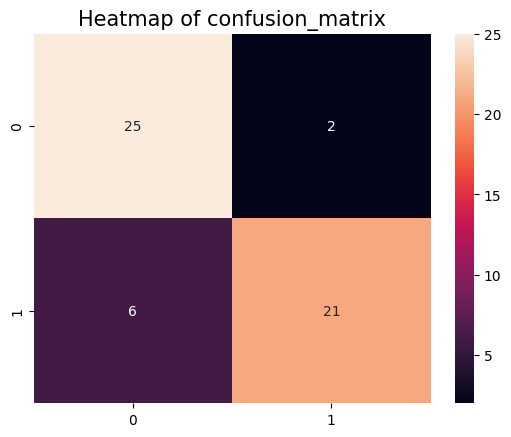

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,lr_pred)
plt.title('Heatmap of confusion_matrix',fontsize=15)
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
svm_model = SVC()
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)
svm_acc = accuracy_score(y_test, svm_pred)
svm_mse = mean_squared_error(y_test, svm_pred)
svm_cm = confusion_matrix(y_test, svm_pred)
svm_cr = classification_report(y_test, svm_pred)
print("SVM model results:")
print("SVM accuracy:", svm_acc)
print("Mean Squared Error:", svm_mse)
print("Confusion Matrix:\n", svm_cm)
print("Classification Report:\n", svm_cr)

SVM model results:
SVM accuracy: 0.8148148148148148
Mean Squared Error: 0.18518518518518517
Confusion Matrix:
 [[23  4]
 [ 6 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.84      0.78      0.81        27

    accuracy                           0.81        54
   macro avg       0.82      0.81      0.81        54
weighted avg       0.82      0.81      0.81        54



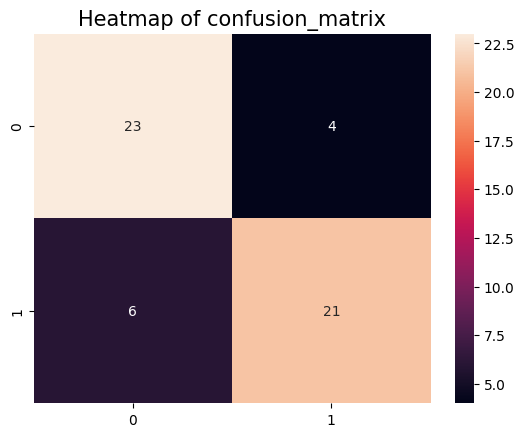

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,svm_pred)
plt.title('Heatmap of confusion_matrix',fontsize=15)
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
id3_model = DecisionTreeClassifier(random_state=2023)
id3_model.fit(x_train, y_train)
id3_pred = id3_model.predict(x_test)
id3_acc = accuracy_score(y_test, id3_pred)
id3_mse = mean_squared_error(y_test, id3_pred)
id3_cm = confusion_matrix(y_test, id3_pred)
id3_cr = classification_report(y_test, id3_pred)
print("\nID3 model results:")
print("ID3 accuracy:", id3_acc)
print("Mean Squared Error:", id3_mse)
print("Confusion Matrix:\n", id3_cm)
print("Classification Report:\n", id3_cr)


ID3 model results:
ID3 accuracy: 0.8888888888888888
Mean Squared Error: 0.1111111111111111
Confusion Matrix:
 [[26  1]
 [ 5 22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90        27
           1       0.96      0.81      0.88        27

    accuracy                           0.89        54
   macro avg       0.90      0.89      0.89        54
weighted avg       0.90      0.89      0.89        54



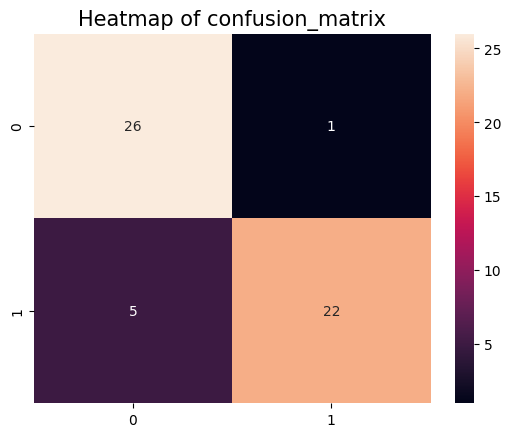

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,id3_pred)
plt.title('Heatmap of confusion_matrix',fontsize=15)
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
print (lr_acc)
print(svm_acc)
print(id3_acc)

0.8518518518518519
0.8148148148148148
0.8888888888888888


In [ ]:
TestData=pd.DataFrame({
    'Age':52,
    'Gender':1,
    'Chest pain type':1,
    'BP':125,
    'Cholesterol':212,
    'FBS over 120':0,
    'EKG results':1,
    'Max HR':120,
    'Exercise angina':0,
    'ST depression':1.0,
    'Slope of ST':2,
    'Number of vessels fluro':0,
    'Thallium':3,
    'smoking_status':0, 
    },index=[0])

In [ ]:
TestData=pd.get_dummies(TestData,columns=['smoking_status','Chest pain type','EKG results','Slope of ST','Thallium'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
TestData[['Age', 'BP', 'Cholesterol', 'FBS over 120', 'Max HR', 'ST depression']] = scaler.fit_transform(TestData[['Age', 'BP', 'Cholesterol', 'FBS over 120', 'Max HR', 'ST depression']])

In [ ]:
missing_col=set(x.columns)-set(TestData.columns)
for col in missing_col:
  TestData[col]=0

In [ ]:
TestData = TestData.loc[:, x.columns]

In [ ]:
ans=id3_model.predict(TestData)

if ans==0:
  print("You Don't have Heart disease")
else:
  print("You have Heart disease")

You Don't have Heart disease
